<a href="https://colab.research.google.com/github/DakshLohchab/BLDC-Motor-controller/blob/main/yollo11_obj_detection_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Step1: Importing Essential Modules**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step2: Importing dataset from robuflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="REWobSHbY4glWXIxzVQP")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-1 in yolov11:: 100%|██████████| 6560/6560 [00:01<00:00, 3538.95it/s]


In [ ]:
dataset.location

'/content/PPE_Detection-1'

**Training the yolo11 on the above dataset**

In [ ]:
!yolo task = detect mode=train data = {dataset.location}/data.yaml epochs = 50 imgsz = 640

100% 5.35M/5.35M [00:00<00:00, 81.8MB/s]
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE_Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

**Examining Training Results**

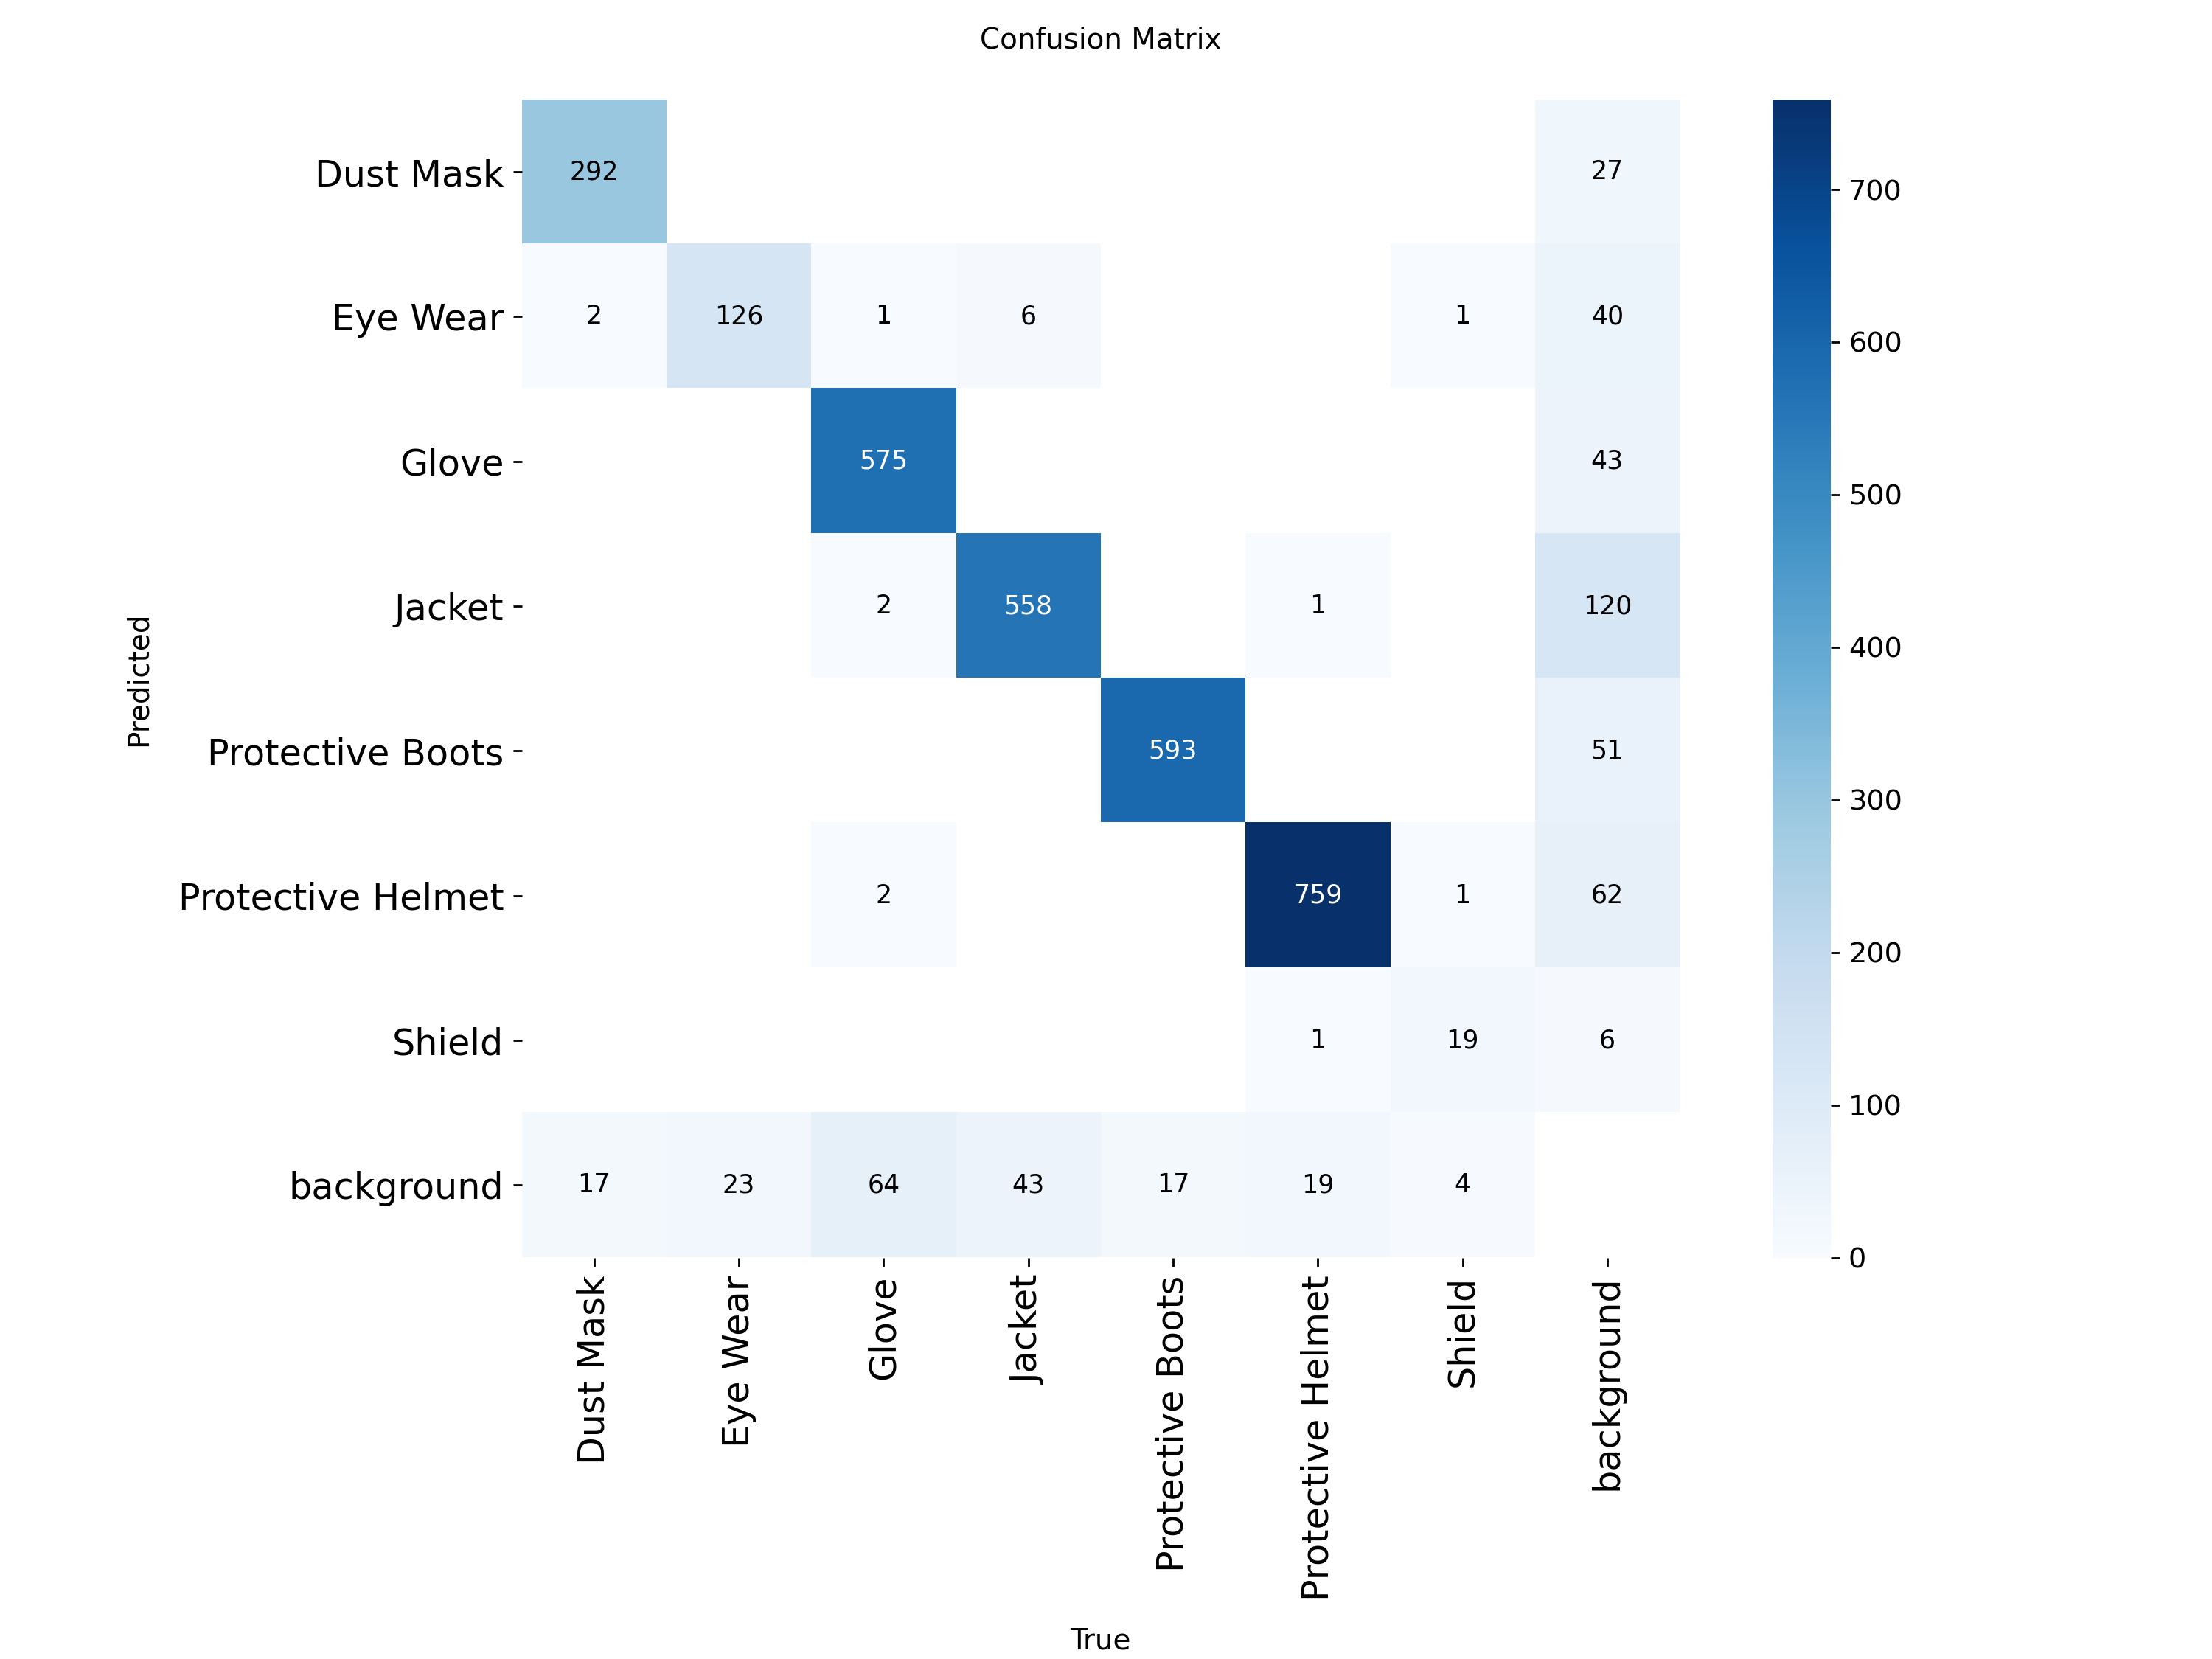

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png",width=600)

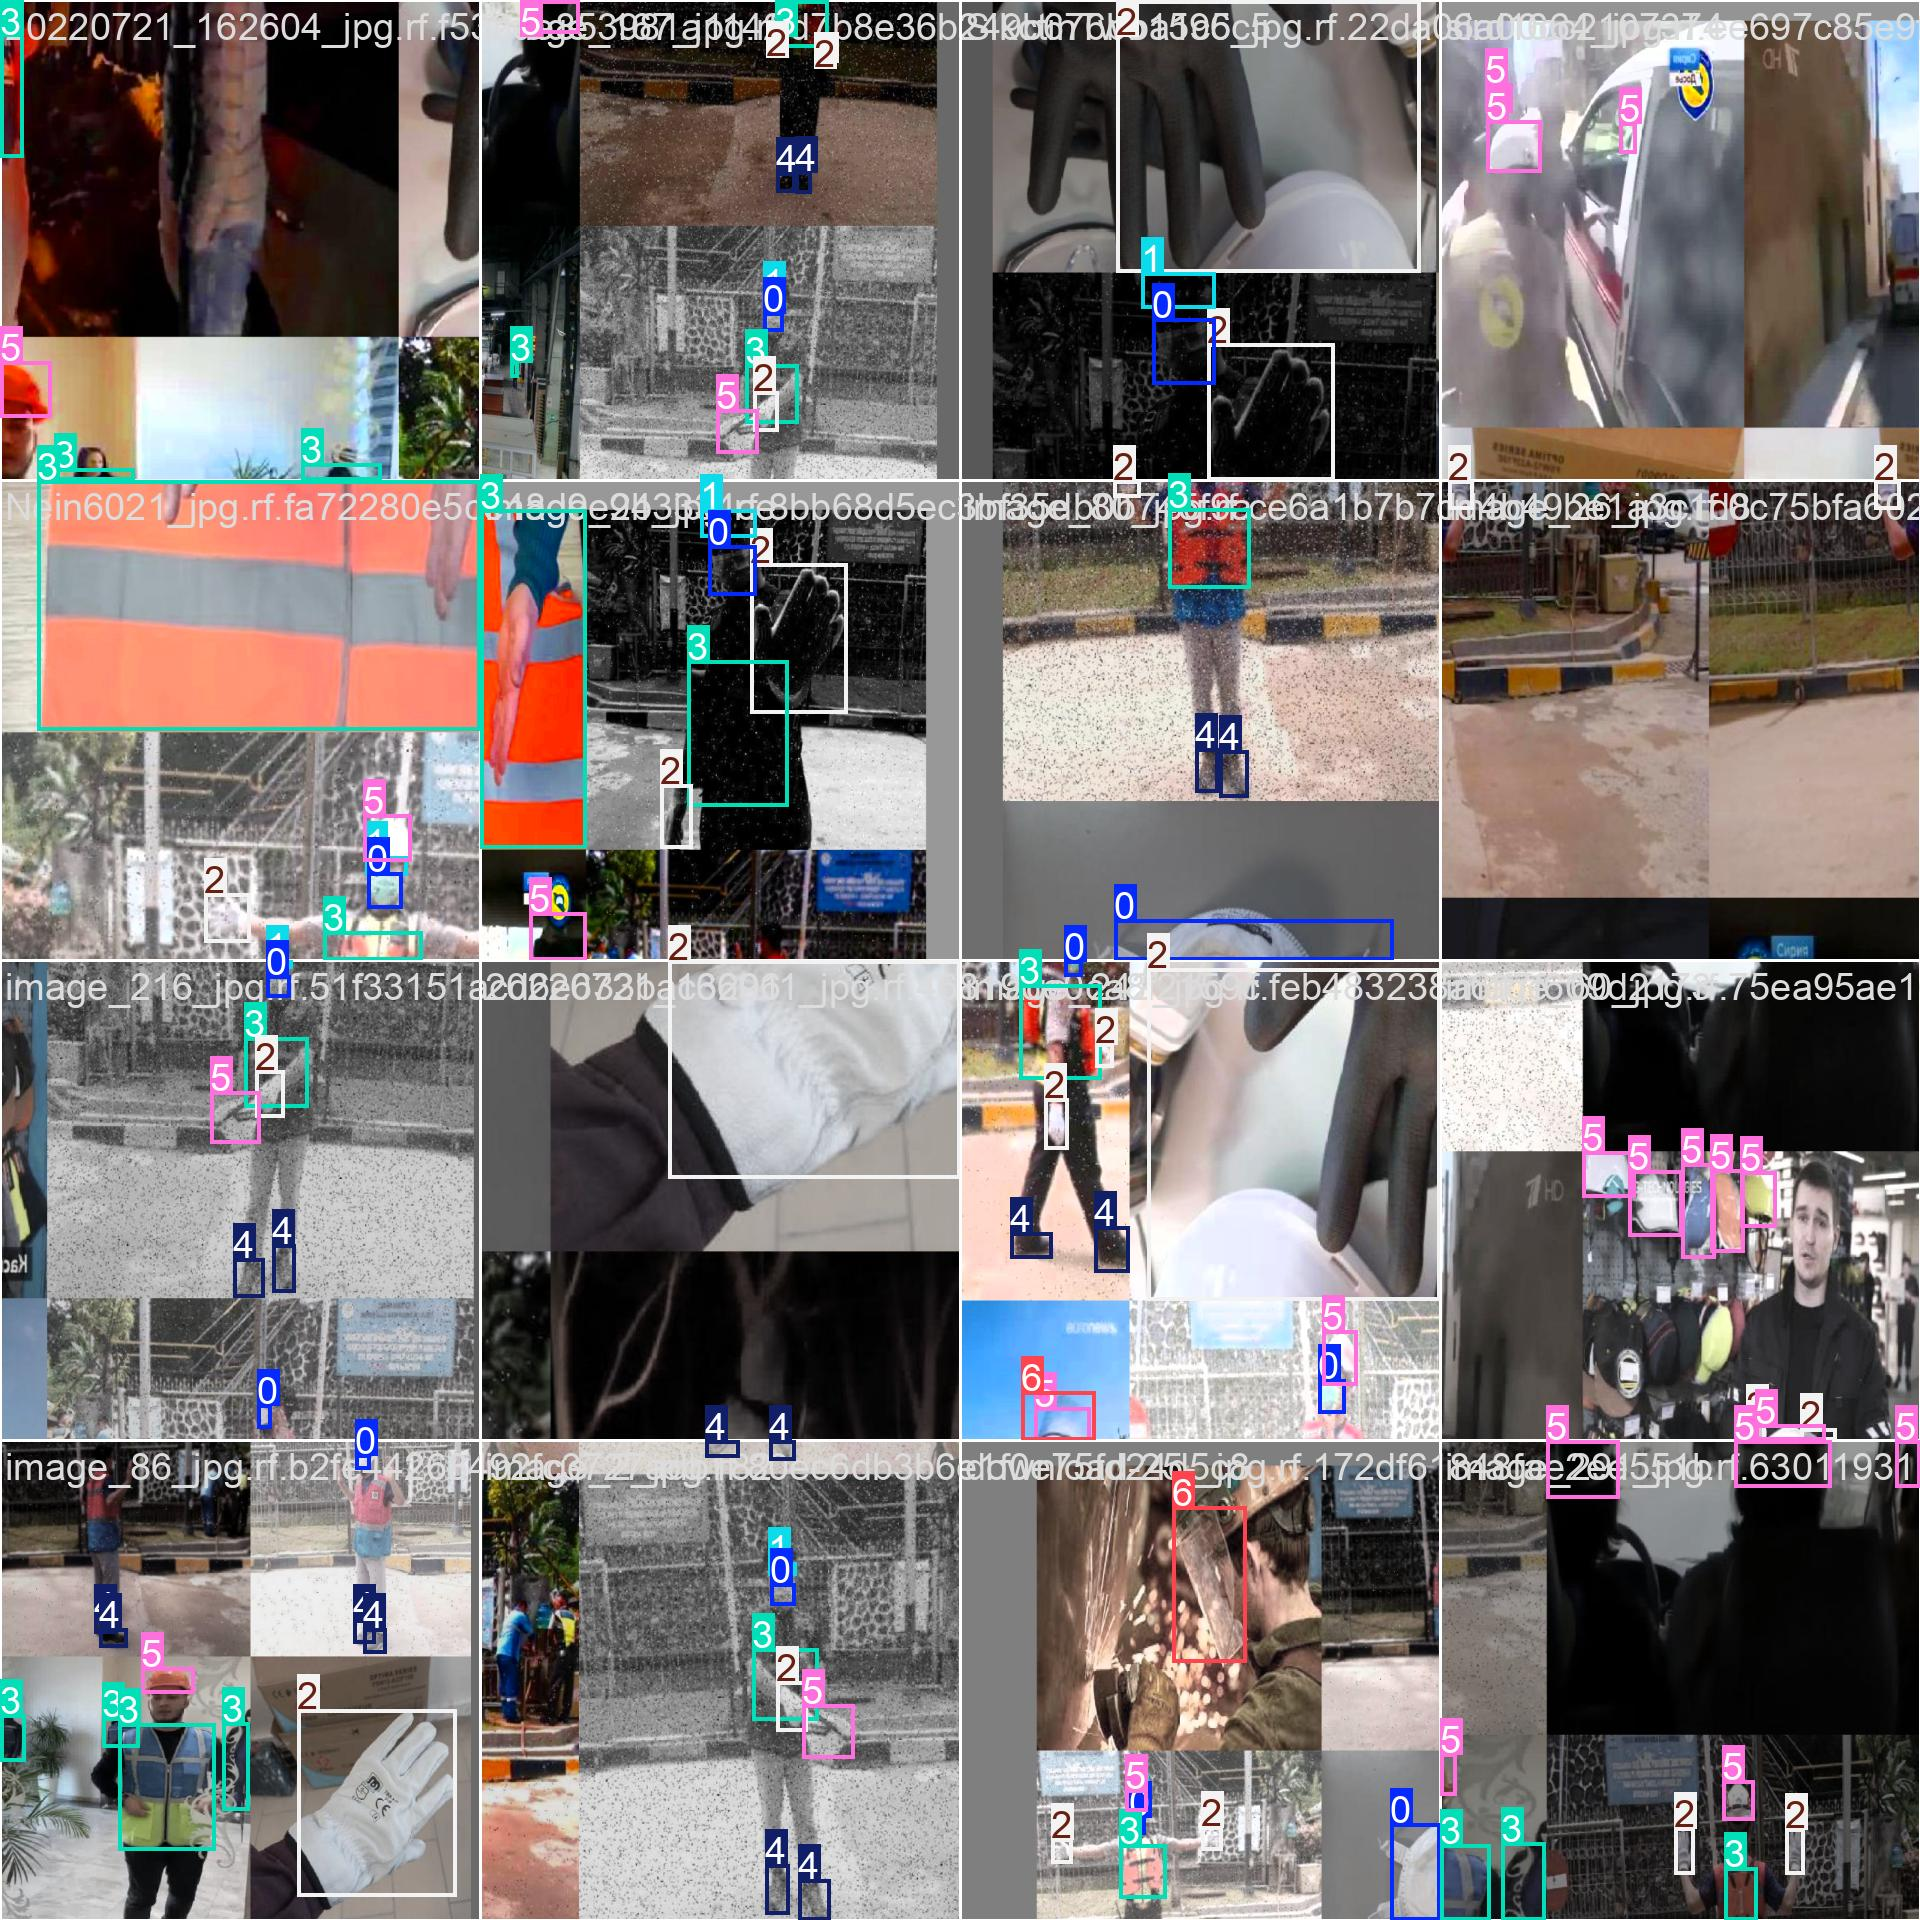

In [ ]:
Image("/content/runs/detect/train/train_batch2.jpg",width=600)

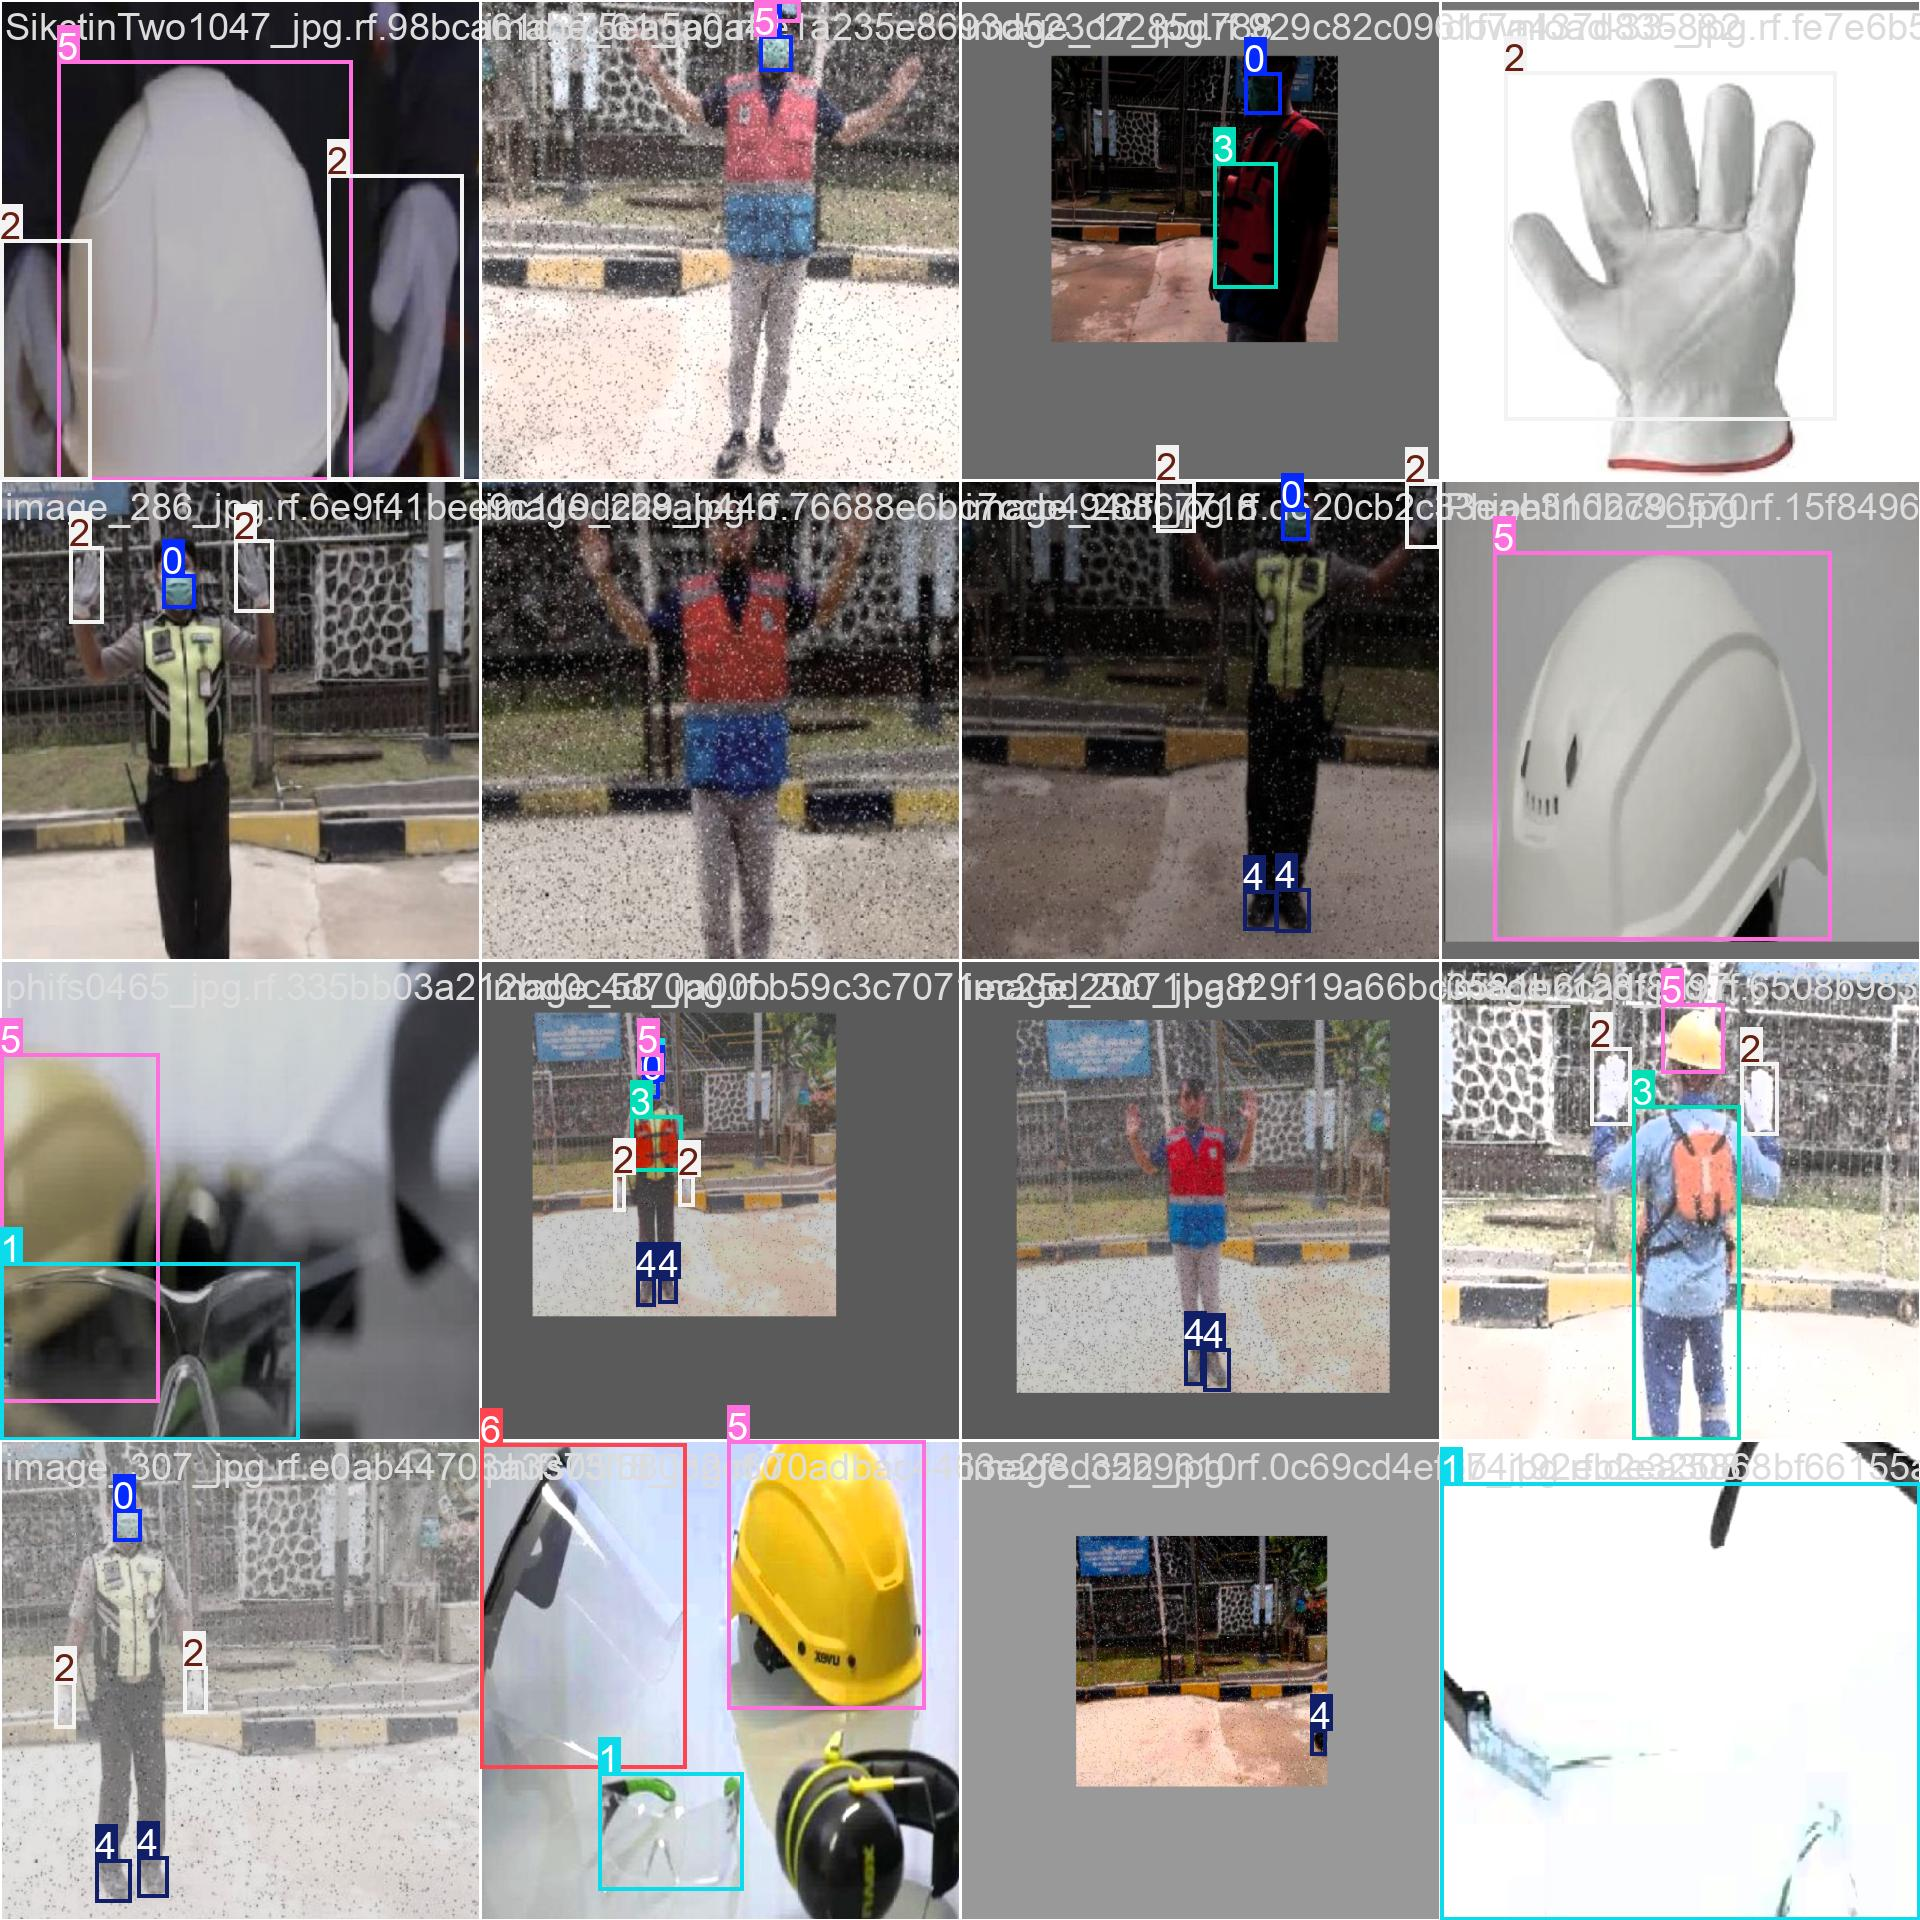

In [ ]:
Image("/content/runs/detect/train/train_batch5761.jpg",width=600)

**Validate-Fine Tuned Model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1119.6±659.2 MB/s, size: 61.3 KB)
val: Scanning /content/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% 649/649 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:08<00:00,  4.98it/s]
                   all        649       3126       0.94      0.829       0.91      0.634
             Dust Mask        301        311      0.975      0.894      0.959      0.676
              Eye Wear        148        149      0.892      0.718      0.789      0.443
                 Glove        354        644       0.97       0.87      0.937      0.679
                Jacket        364        607      0.904      0.864      0.933      0.719
      Protective Boots        299        610      

**Interference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/325 /content/PPE_Detection-1/test/images/000446_jpg.rf.5ea7ca6bde68eb546e8c3dcd1c0fd6d5.jpg: 640x640 1 Glove, 2 Protective Helmets, 13.2ms
image 2/325 /content/PPE_Detection-1/test/images/20220721_161946_jpg.rf.4ff1543edb0405f57fb590d5dcb284b6.jpg: 640x640 (no detections), 9.0ms
image 3/325 /content/PPE_Detection-1/test/images/20220721_162015_jpg.rf.ee54ba7d79baa065a7cfc4666f0fd024.jpg: 640x640 1 Dust Mask, 8.0ms
image 4/325 /content/PPE_Detection-1/test/images/20220721_162036_jpg.rf.9d32aa23505a54eff5555d9b667bb597.jpg: 640x640 1 Dust Mask, 8.3ms
image 5/325 /content/PPE_Detection-1/test/images/20220721_162308_jpg.rf.2f8d1ad4716998b9fc123d94dce4d8b0.jpg: 640x640 1 Dust Mask, 2 Eye Wears, 7.8ms
image 6/325 /content/PPE_Detection-1/test/images/20220721_162435_jpg.rf.f36f898409158c65a23c0604535ff366.jpg: 640x640 2 E